In [59]:
%matplotlib notebook
import glob
from glob import glob
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
#plt.rcParams['ytick.minor.visible'] = True
#plt.rcParams['xtick.minor.visible'] = True

fls = glob('/Users/rsimons/Desktop/foggie/outputs/identify_satellites/*sat_mass_profiles.npy')
sat_prop_cat = ascii.read('/Users/rsimons/Desktop/foggie/outputs/identify_satellites/satellite_properties.cat')
sat_prop_cat = sat_prop_cat[sat_prop_cat['id'] !='0']

<IPython.core.display.Javascript object>


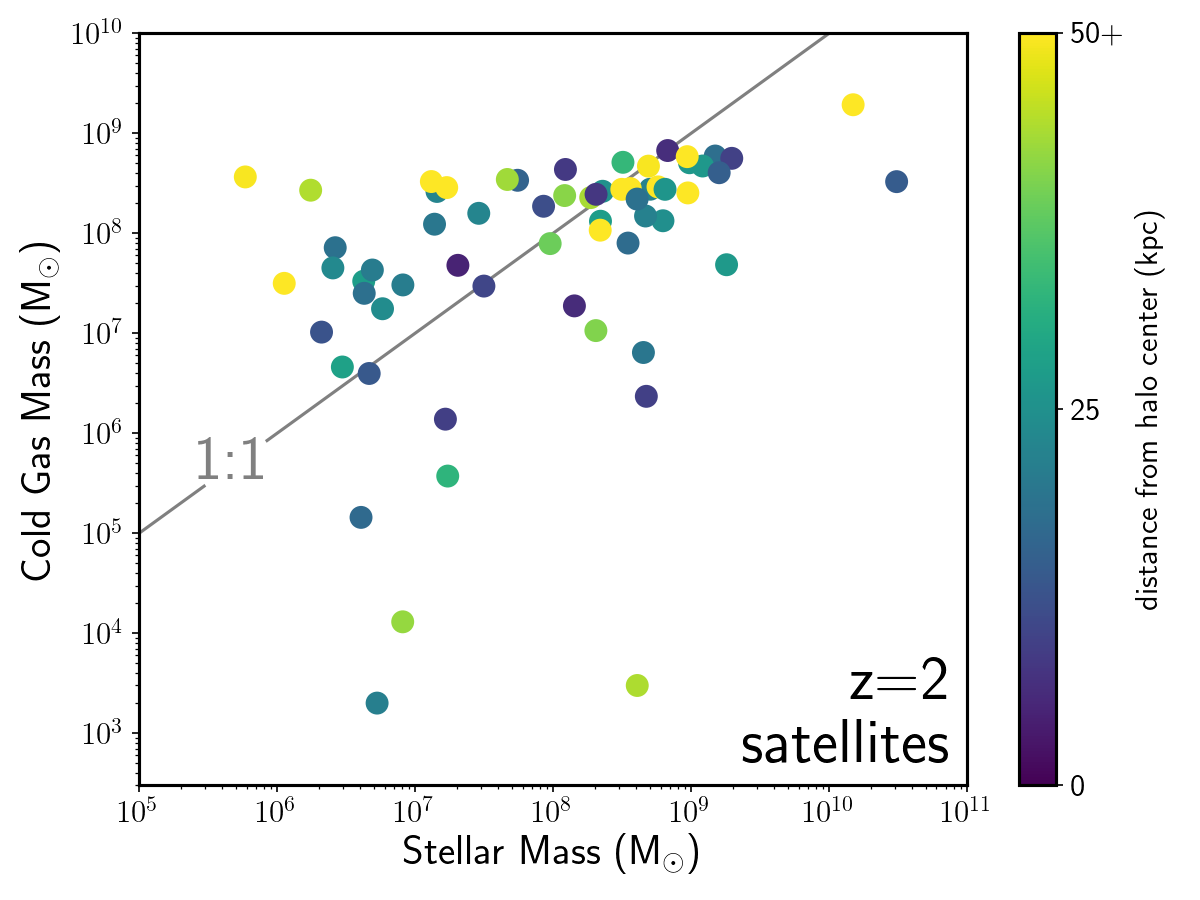

In [96]:
fig, axes = plt.subplots(1,1,figsize = (8,6))
dist_halo = sat_prop_cat['distance_halo']

c_scale = [min([d/50., 1.]) for d in dist_halo]
rad = '2kpc'
star_mass = sat_prop_cat['m_stars_2kpc'] * 1.e8
cold_mass = sat_prop_cat['m_cold_gas_%s'%rad] * 1.e8
dm_mass = sat_prop_cat['m_dm_%s'%rad] * 1.e8

c = plt.cm.viridis(c_scale)
ss = axes.scatter(star_mass, cold_mass, marker = 'o', color = c, cmap  = plt.cm.viridis, s = 100)


cbar = fig.colorbar(ss, ax = axes)
cbar.set_ticks([0, 0.5, 1])
cbar.set_ticklabels(['0', '25', '50+'])
cbar.set_label('distance from halo center (kpc)')
axes.plot([0, 1.e11], [0,1.e11], '-', color = 'grey', zorder = 0)
axes.set_xlim(1.e5, 1.e11)
axes.set_ylim(3.e2, 1.e10)


#axes.annotate('z=2\nsatellites\nsix nref11c haloes', (0.98, 0.03), ha = 'right', xycoords = 'axes fraction', fontsize = 20)
axes.annotate('z=2\nsatellites', (0.98, 0.03), ha = 'right', xycoords = 'axes fraction', fontsize = 30)


bbox_props = dict(boxstyle="Circle,pad=0", fc="white", ec="white", lw=0)
axes.annotate(r'1:1', (axes.get_xlim()[0] * 5., axes.get_xlim()[0]*5), ha = 'center', va ='center', rotation = 0, xycoords = 'data', fontsize = 30, color = 'grey', bbox = bbox_props)


axes.set_xlabel('Stellar Mass (M$_{\odot}$)', fontsize = 20)
axes.set_ylabel('Cold Gas Mass (M$_{\odot}$)', fontsize = 20)


axes.set_yscale('log')
axes.set_xscale('log')


fig.tight_layout()
fig.savefig('/Users/rsimons/Desktop/foggie/figures/random/mass_comparison_satellites.png', dpi = 300)

<IPython.core.display.Javascript object>


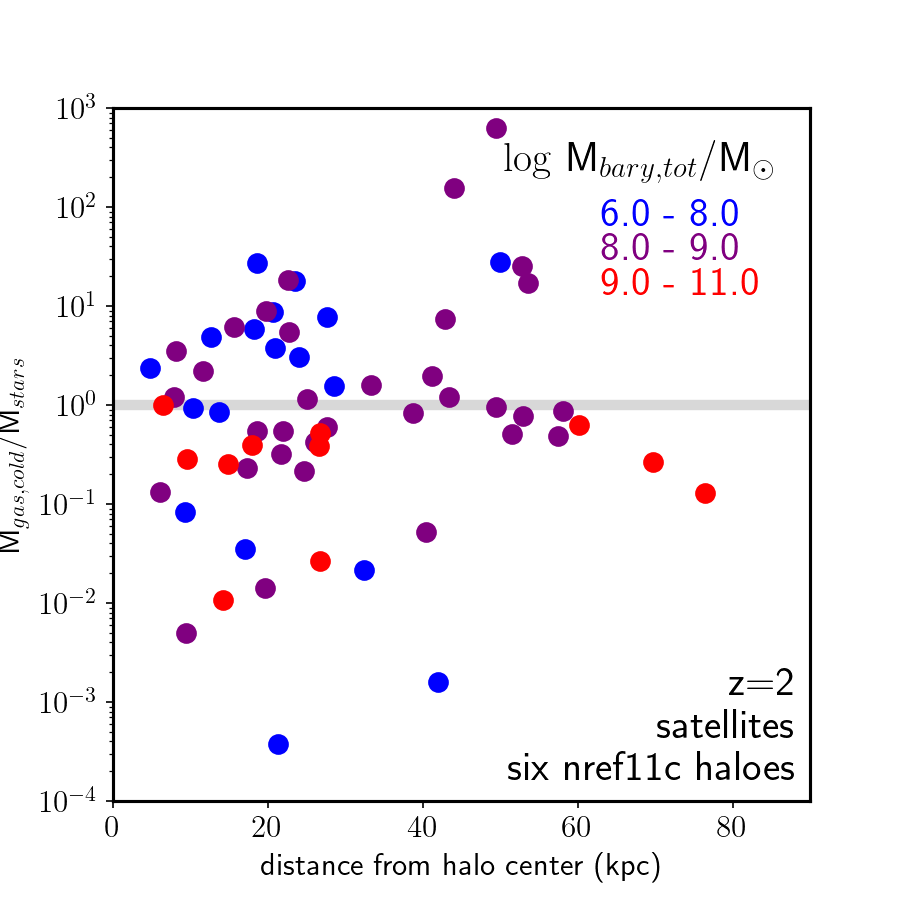

In [97]:
fig, axes = plt.subplots(1,1,figsize = (6,6))
dist_halo = sat_prop_cat['distance_halo']

c_scale = [min([d/50., 1.]) for d in dist_halo]
rad = '2kpc'
star_mass = sat_prop_cat['m_stars_2kpc'] * 1.e8
cold_mass = sat_prop_cat['m_cold_gas_%s'%rad] * 1.e8
bary_mass = star_mass + cold_mass
dm_mass = sat_prop_cat['m_dm_%s'%rad] * 1.e8




clrs = ['blue', 'purple', 'red']

axes.annotate(r'$\log$ M$_{bary,tot}$/M$_{\odot}$',\
              (0.95, 0.90), ha = 'right', \
              xycoords = 'axes fraction', fontsize = 20, color = 'black')

for m, mass_bin in enumerate([(1.e6, 1.e8), (1.e8, 1.e9), (1.e9, 1.e11)]):
    gd = where((bary_mass > mass_bin[0]) & (bary_mass < mass_bin[1]))

    ss = axes.scatter(dist_halo[gd], cold_mass[gd]/star_mass[gd], marker = 'o', color = clrs[m], s = 80)

    axes.annotate(r'%.1f - %.1f'%(log10(mass_bin[0]), log10(mass_bin[1])),\
                  (0.70, 0.83 - m*0.05), ha = 'left', \
                  xycoords = 'axes fraction', fontsize = 20, color = clrs[m])

axes.set_xlim(0, 90)
axes.set_ylim(1.e-4, 1.e3)

axes.axhline(y = 1, color = 'grey', zorder = 0, alpha = 0.3, linewidth = 5)

axes.annotate('z=2\nsatellites\nsix nref11c haloes', (0.98, 0.03), ha = 'right', xycoords = 'axes fraction', fontsize = 20)

axes.set_xlabel('distance from halo center (kpc)')
axes.set_ylabel('M$_{gas, cold}$/M$_{stars}$')


axes.set_yscale('log')

fig.savefig('/Users/rsimons/Desktop/foggie/figures/random/gasfraction_comparison_satellites.png', dpi = 300)



<IPython.core.display.Javascript object>


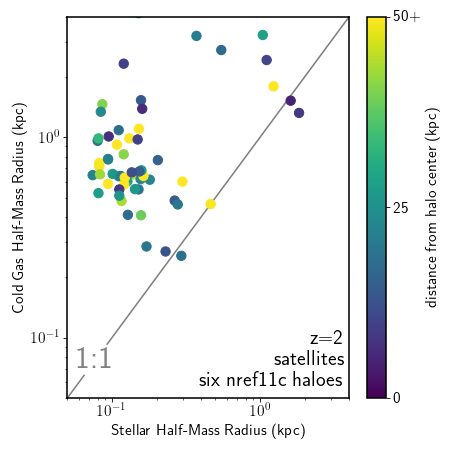

In [19]:
fig, axes = plt.subplots(1,1,figsize = (6,6))
dist_halo = sat_prop_cat['distance_halo']

c_scale = [min([d/50., 1.]) for d in dist_halo]
rad = '2kpc'
re_stars = sat_prop_cat['re_stars']
re_gas = sat_prop_cat['re_cold_gas']

c = plt.cm.viridis(c_scale)
ss = axes.scatter(re_stars, re_gas, marker = 'o', color = c, cmap  = plt.cm.viridis, s = 80)


cbar = fig.colorbar(ss, ax = axes)
cbar.set_ticks([0, 0.5, 1])
cbar.set_ticklabels(['0', '25', '50+'])
cbar.set_label('distance from halo center (kpc)')
axes.plot([0, 1.e11], [0,1.e11], '-', color = 'grey', zorder = 0)
axes.set_xlim(5.e-2, 4.e0)
axes.set_ylim(5.e-2, 4.e0)


axes.annotate('z=2\nsatellites\nsix nref11c haloes', (0.98, 0.03), ha = 'right', xycoords = 'axes fraction', fontsize = 20)

bbox_props = dict(boxstyle="Circle,pad=0", fc="white", ec="white", lw=0)
axes.annotate(r'1:1', (0.1, 0.1), ha = 'center', va ='center', rotation = 0, xycoords = 'axes fraction', fontsize = 30, color = 'grey', bbox = bbox_props)


axes.set_xlabel('Stellar Half-Mass Radius (kpc)')
axes.set_ylabel('Cold Gas Half-Mass Radius (kpc)')


axes.set_yscale('log')
axes.set_xscale('log')


fig.tight_layout()

<IPython.core.display.Javascript object>


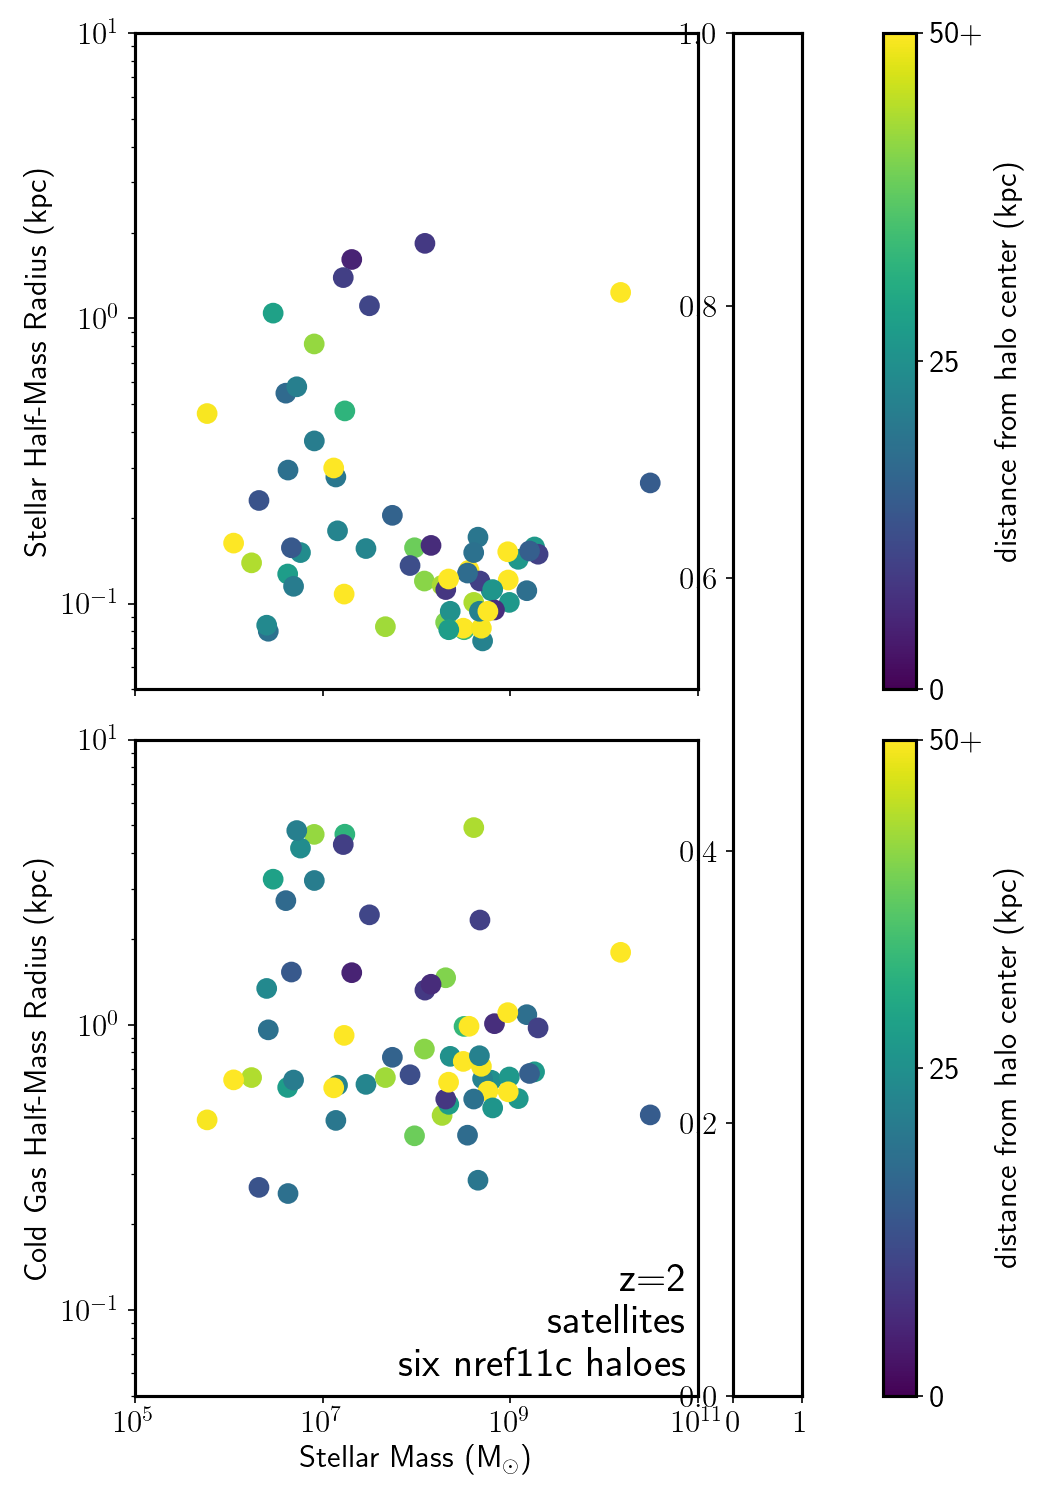

In [61]:
fig, axes = plt.subplots(2,1,figsize = (7,10.), sharex = True)
dist_halo = sat_prop_cat['distance_halo']

c_scale = [min([d/50., 1.]) for d in dist_halo]
rad = '2kpc'
re_stars = sat_prop_cat['re_stars']
re_gas = sat_prop_cat['re_cold_gas']
m_stars = sat_prop_cat['m_stars_2kpc'] * 1.e8
m_gas = sat_prop_cat['m_cold_gas_2kpc'] * 1.e8

star_mass = sat_prop_cat['m_stars_2kpc'] * 1.e8
cold_mass = sat_prop_cat['m_cold_gas_%s'%rad] * 1.e8
bary_mass = star_mass + cold_mass

re = [re_stars, re_gas]



for a, ax in enumerate(axes):
    c = plt.cm.viridis(c_scale)
    ss = ax.scatter(m_stars, re[a], marker = 'o', color = c, cmap  = plt.cm.viridis, s = 80)


    cbar = fig.colorbar(ss, ax = ax, orientation = 'vertical')
    cbar.set_ticks([0, 0.5, 1])
    cbar.set_ticklabels(['0', '25', '50+'])
    cbar.set_label('distance from halo center (kpc)')
    if a == 1: ax.set_xlabel('Stellar Mass (M$_{\odot}$)')


    ax.set_xlim(1.e5, 1.e11)
    ax.set_ylim(5.e-2, 10.e0)




    ax.set_yscale('log')
    ax.set_xscale('log')

    
axes[0].set_ylabel('Stellar Half-Mass Radius (kpc)')
axes[1].set_ylabel('Cold Gas Half-Mass Radius (kpc)')
axes[1].annotate('z=2\nsatellites\nsix nref11c haloes', (0.98, 0.03), ha = 'right', xycoords = 'axes fraction', fontsize = 20)


fig.tight_layout()




<IPython.core.display.Javascript object>


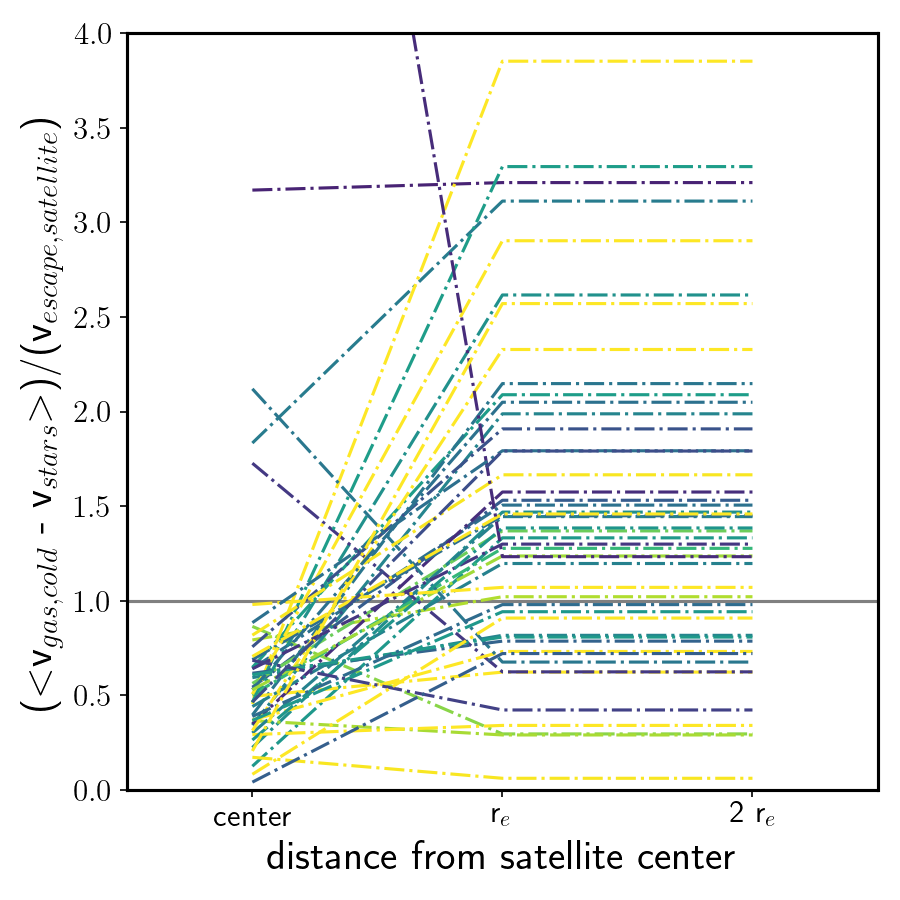

In [98]:
fig, ax = plt.subplots(1,1,figsize = (6,6))
dist_halo = sat_prop_cat['distance_halo']


c_scale = [min([d/50., 1.]) for d in dist_halo]
rad = '2kpc'
v_cold_gas_cen = sat_prop_cat['v_cold_gas_cen']
v_cold_gas_re_s = sat_prop_cat['v_cold_gas_re_s']
v_cold_gas_2re_s = sat_prop_cat['v_cold_gas_re_s']

star_mass = sat_prop_cat['m_stars_2kpc'] * 1.e8
cold_mass = sat_prop_cat['m_cold_gas_%s'%rad] * 1.e8
bary_mass = star_mass + cold_mass
import yt
from yt.units import G, kpc, Msun
G_u = G.to('km**2*kpc/(Msun*s**2)')


vesc = np.sqrt(2 * G_u * bary_mass/(2))



for i in arange(len(v_cold_gas_cen[:])):
    

    c = plt.cm.viridis(c_scale[i])

    all_vel = [v_cold_gas_cen[i], v_cold_gas_re_s[i], v_cold_gas_2re_s[i]]
    ss = ax.plot([0,1,2], all_vel/vesc[i],'-.', color = c)#, cmap  = plt.cm.viridis, markersize = 80)
ax.axhline(y = 1.0, zorder = 0, color = 'grey')

'''
cbar = fig.colorbar(ss, ax = ax, orientation = 'vertical')
cbar.set_ticks([0, 0.5, 1])
cbar.set_ticklabels(['0', '25', '50+'])
cbar.set_label('distance from halo center (kpc)')
if a == 1: ax.set_xlabel('Stellar Mass (M$_{\odot}$)')
'''

ax.set_xlim(-0.5, 2.5)
ax.set_ylim(0, 4)

ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['center', 'r$_{e}$', '2 r$_{e}$'])


'''
cbar = fig.colorbar(ss, ax = ax)
cbar.set_ticks([0, 0.5, 1])
cbar.set_ticklabels(['0', '25', '50+'])
cbar.set_label('distance from halo center (kpc)')
'''

#ax.set_yscale('log')
#ax.set_xscale('log')

    
ax.set_xlabel('distance from satellite center', fontsize = 20)
ax.set_ylabel(r'($<$v$_{gas, cold}$ - v$_{stars}$$>$)/(v$_{escape, satellite}$)', fontsize = 20)

fig.tight_layout()
fig.savefig('/Users/rsimons/Desktop/foggie/figures/random/vescp_distance.png', dpi = 300)



In [86]:
G_u

1.3937404955553936e-22 km*kpc**2/(Msun*s**2)

In [76]:
G.to('km*kpc**2/(Msun*s**2)')

1.3937404955553936e-22 km*kpc**2/(Msun*s**2)